In [1]:
import os
import pickle
import json
from time import time
import keras
from keras.layers import Input, Dense, Lambda, Conv2D, Conv2DTranspose, Activation, Flatten, Reshape, LeakyReLU
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import Model, model_from_json, Sequential
from keras import backend as K
from keras.metrics import *
from sklearn.metrics import silhouette_score

os.environ["CUDA_VISIBLE_DEVICES"] = '1' 

from keras.datasets import mnist
import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
# config.gpu_options.per_process_gpu_memory_fraction = 0.48
set_session(tf.Session(config=config))
from keras.datasets import mnist
import numpy as np

import sys  
sys.path.append('../')
from util import importNotebook
from util.util import *
from util.dataProcess import *

Using TensorFlow backend.


importing Jupyter notebook from ../util/dataProcess.ipynb


# Predict the values of the deepest hidden layer and plot the scatter

In [2]:
def scatHidPred(visual, xTest):
    # Predict the values of the deepest hidden layer
    encodeTest = visual.predict(xTest)
    meanEncTest = np.mean(encodeTest, axis=0)
    stdEncTest = np.std(encodeTest, axis=0)
    xlim = (meanEncTest[0] - 4*stdEncTest[0], meanEncTest[0] + 4*stdEncTest[0])
    ylim = (meanEncTest[1] - 4*stdEncTest[1], meanEncTest[1] + 4*stdEncTest[1])

    # Plot the scatter
    plotScatterEncode(encodeTest, yTest, xlim, ylim, numShow=10000)
    scoreSilh = silhouette_score(encodeTest, yTest)  

# Load datasets

In [3]:
(xTrain, yTrain), (xTest, yTest) = mnist.load_data()
xTrain = xTrain.astype('float32') / 255.
xTest = xTest.astype('float32') / 255.
numTrain = len(xTrain)
numTest = len(xTest)
numClass = 10
sizeDigit = xTrain.shape[1:]

dimInput = np.prod(xTrain.shape[1:])
xTrain = xTrain.reshape((numTrain, dimInput))
xTest = xTest.reshape((numTest, dimInput))
print(xTrain.shape)
print(xTest.shape)


(60000, 784)
(10000, 784)


# Build models

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 784)               0         
_________________________________________________________________
hidden1 (Dense)              (None, 128)               100480    
_________________________________________________________________
hidden2 (Dense)              (None, 16)                2064      
_________________________________________________________________
hidden3 (Dense)              (None, 2)                 34        
_________________________________________________________________
output (Dense)               (None, 10)                30        
Total params: 102,608
Trainable params: 102,608
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 40us/step - loss: 1.4630 

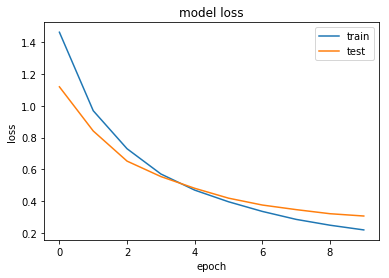

In [4]:
sizeBatch = 128

inputs = Input(shape=(dimInput,), name='input')
x = Dense(128, activation='relu', name='hidden1')(inputs)
x = Dense(16, activation='relu', name='hidden2')(x)
x = Dense(2, activation='relu', name='hidden3')(x)
outputs = Dense(10, activation='softmax', name='output')(x)

model = Model(inputs, outputs)
model.summary()
model.compile(optimizer='adam', loss='categorical_crossentropy')

history = model.fit(xTrain, dummy(yTrain, numClass),
                    epochs=10,
                    batch_size=sizeBatch,
                    validation_data=(xTest, dummy(yTest, numClass)))
plotProgress(history)

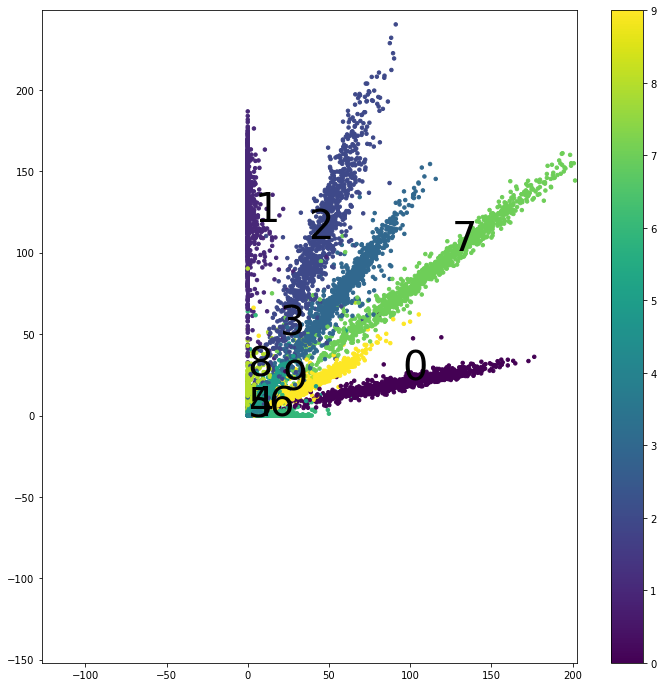

In [5]:
# Build model to present the deepest hidden layer for visualization
visual = Model(model.input, model.get_layer('hidden3').output)
scatHidPred(visual, xTest)


# The example for saving as model.h5

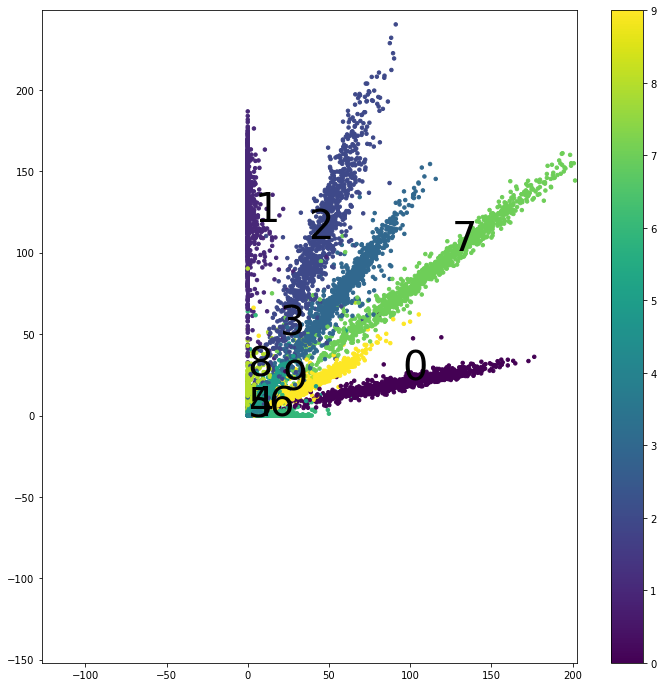

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 29us/step - loss: 0.1947 - val_loss: 0.2938
Epoch 2/10
60000/60000 [==============================] - 2s 28us/step - loss: 0.1774 - val_loss: 0.2895
Epoch 3/10
60000/60000 [==============================] - 2s 27us/step - loss: 0.1598 - val_loss: 0.2916
Epoch 4/10
60000/60000 [==============================] - 2s 28us/step - loss: 0.1471 - val_loss: 0.2881
Epoch 5/10
60000/60000 [==============================] - 2s 29us/step - loss: 0.1334 - val_loss: 0.2809
Epoch 6/10
60000/60000 [==============================] - 2s 33us/step - loss: 0.1236 - val_loss: 0.2851
Epoch 7/10
60000/60000 [==============================] - 2s 30us/step - loss: 0.1120 - val_loss: 0.2871
Epoch 8/10
60000/60000 [==============================] - 2s 30us/step - loss: 0.1066 - val_loss: 0.2774
Epoch 9/10
60000/60000 [==============================] - 2s 32us/step - loss: 0.0971 - val_loss: 0.2837
Epoch

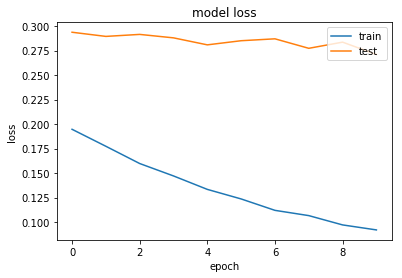

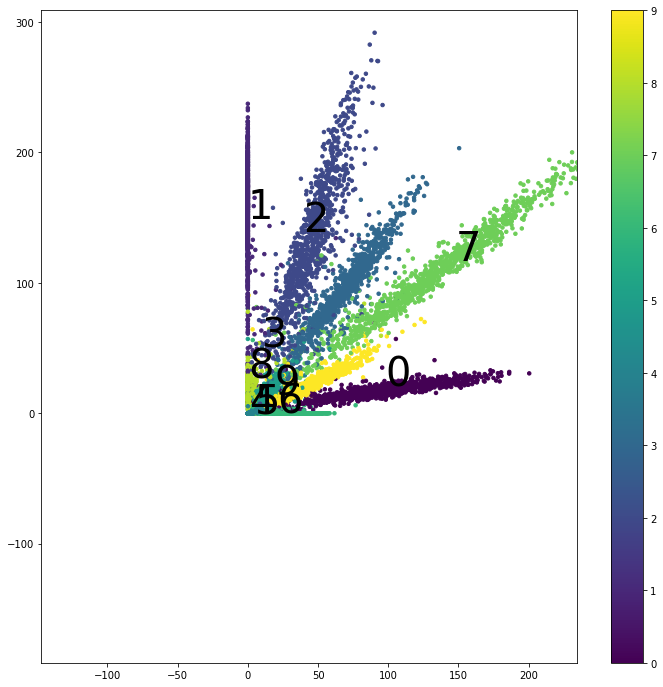

In [6]:
model.save('../model/example/model.h5')
model1 = keras.models.load_model('../model/example/model.h5')

visual1 = Model(model1.input, model1.get_layer('hidden3').output)
scatHidPred(visual1, xTest)

history1 = model1.fit(xTrain, dummy(yTrain, 10),
                      epochs=10,
                      batch_size=sizeBatch,
                      validation_data=(xTest, dummy(yTest, numClass)))
plotProgress(history1)

visual1 = Model(model1.input, model1.get_layer('hidden3').output)
scatHidPred(visual1, xTest)

# The example for saving as config.json and weight.h5

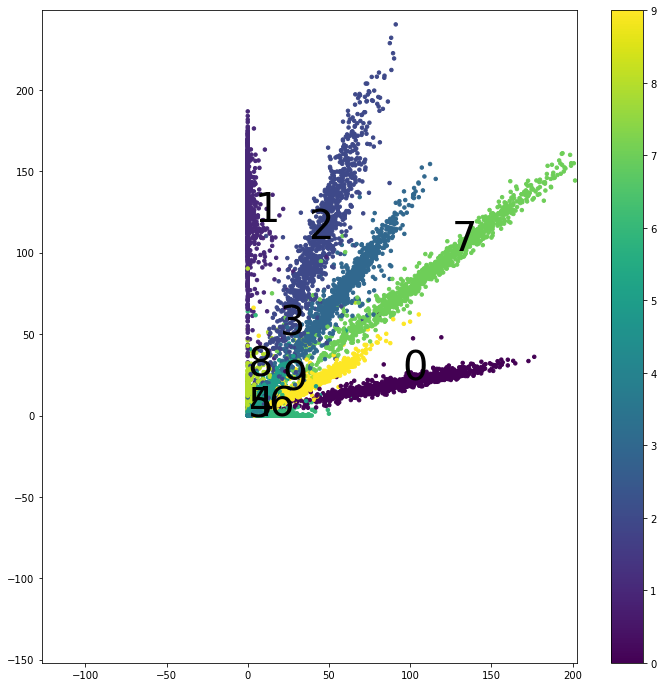

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 37us/step - loss: 0.1951 - val_loss: 0.3108
Epoch 2/10
60000/60000 [==============================] - 2s 28us/step - loss: 0.1744 - val_loss: 0.2908
Epoch 3/10
60000/60000 [==============================] - 2s 28us/step - loss: 0.1575 - val_loss: 0.3035
Epoch 4/10
60000/60000 [==============================] - 2s 29us/step - loss: 0.1429 - val_loss: 0.2867
Epoch 5/10
60000/60000 [==============================] - 2s 28us/step - loss: 0.1301 - val_loss: 0.2843
Epoch 6/10
60000/60000 [==============================] - 2s 28us/step - loss: 0.1191 - val_loss: 0.2841
Epoch 7/10
60000/60000 [==============================] - 2s 28us/step - loss: 0.1095 - val_loss: 0.2874
Epoch 8/10
60000/60000 [==============================] - 2s 30us/step - loss: 0.1026 - val_loss: 0.3042
Epoch 9/10
60000/60000 [==============================] - 2s 28us/step - loss: 0.0944 - val_loss: 0.2885
Epoch

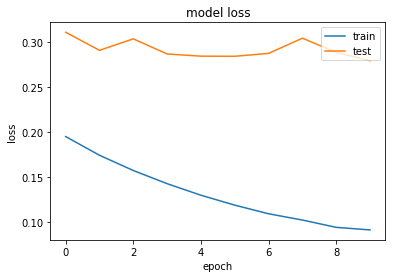

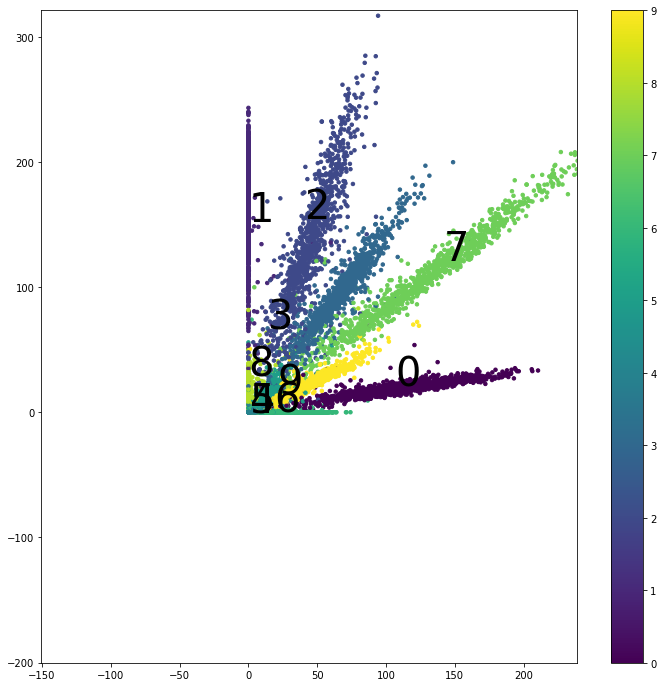

In [7]:
with open('../model/example/config.json', 'w') as jsonFile:
    jsonFile.write(model.to_json())
model.save_weights('../model/example/weight.h5')

with open('../model/example/config.json', 'r') as jsonFile:                              
    jsonConfig = jsonFile.readlines()[0]
model2 = model_from_json(jsonConfig)
model2.load_weights('../model/example/weight.h5')

visual2 = Model(model2.input, model2.get_layer('hidden3').output)
scatHidPred(visual2, xTest)

model2.compile(optimizer='adam', loss='categorical_crossentropy')
history2 = model2.fit(xTrain, dummy(yTrain, 10),
                      epochs=10,
                      batch_size=sizeBatch,
                      validation_data=(xTest, dummy(yTest, numClass)))
plotProgress(history2)

visual2 = Model(model2.input, model2.get_layer('hidden3').output)
scatHidPred(visual2, xTest)

# Load model from config and set weight
# Compare the visualization between before and after retraining

In [8]:
model3 = keras.models.load_model('../model/illustration/model.h5')
visual3 = Model.from_config(model3.get_config())
visual3.set_weights(model3.get_weights())
visual3 = Model(visual3.input, visual3.get_layer('hidden3').output)
scatHidPred(visual3, xTest)

history3 = model3.fit(xTrain, dummy(yTrain, 10),
                      epochs=10,
                      batch_size=sizeBatch,
                      validation_data=(xTest, dummy(yTest, numClass)))
plotProgress(history3)

# Compare the visualization between before and after retraining.
# Note that they are not the same because it will be new object from setting config and weights
scatHidPred(visual3, xTest)
scatHidPred(Model(model3.input, model3.get_layer('hidden3').output), xTest)

OSError: Unable to open file (unable to open file: name = '../model/illustration/model.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

# Set model with Model()
# Compare the visualization between before and after retraining

In [ ]:
model4 = keras.models.load_model('../model/illustration/model.h5')
visual4 = Model(model4.input, model4.get_layer('hidden3').output)
scatHidPred(visual4, xTest)

history4 = model4.fit(xTrain, dummy(yTrain, 10),
                      epochs=10,
                      batch_size=sizeBatch,
                      validation_data=(xTest, dummy(yTest, numClass)))
plotProgress(history4)

# Compare the visualization between before and after Model().
# Note that they are the same because the same reference
scatHidPred(visual4, xTest)
scatHidPred(Model(model4.input, model4.get_layer('hidden3').output), xTest)